LIBRARIES

In [25]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

WRANGLE THE DATA

In [28]:
#create a wrangle function
def wrangle(filepath):
    #load the dataset
    df = pd.read_csv(filepath)
    
    #drop the customer ID column
    df.drop(columns=["CustomerID","Gender","Spending Score (1-100)"],inplace=True)
    
    #scale the dataset
    low,high = df["Annual Income (k$)"].quantile([0.1,0.9])
    mask = df["Annual Income (k$)"].between(low,high)
    df = df[mask]

    #return the data frame
    return df

LOAD THE DATASET

In [29]:
df = wrangle(r"C:\Users\IFB19-039\Desktop\machine learning\sims customer seg.csv")
df.shape
df.head()

,Age,Annual Income (k$)
20,35,24
21,25,24
22,46,25
23,31,25
24,54,28


In [30]:
#print out the summary stats
df.describe()

,Age,Annual Income (k$)
count,160.000000,160.000000
mean,39.781250,59.637500
std,14.356938,17.813318
min,18.000000,24.000000
25%,28.750000,46.000000
50%,38.000000,61.500000
75%,49.250000,74.250000
max,70.000000,93.000000


DATA VISUALIZATION

In [31]:
#what is the correlation of the 3 observations
df.corr()

,Age,Annual Income (k$)
Age,1.00000,-0.07431
Annual Income (k$),-0.07431,1.00000


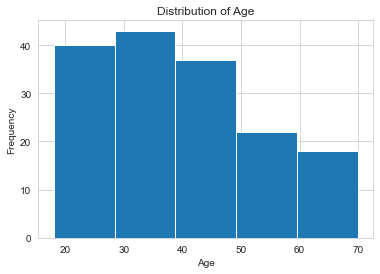

In [32]:
#create a scatter plot for age vs income
df["Age"].hist(bins=5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age");

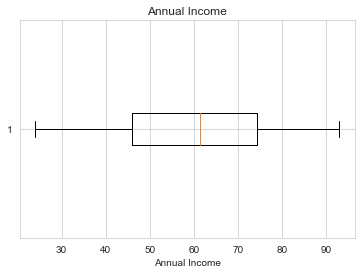

In [34]:
plt.boxplot(df["Annual Income (k$)"],vert=False)
plt.xlabel("Annual Income")
plt.title("Annual Income");

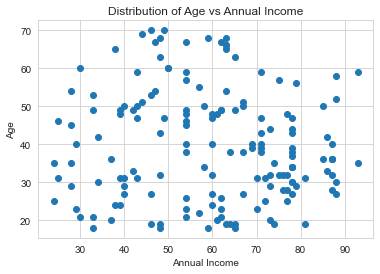

In [35]:
plt.scatter(x=df["Annual Income (k$)"], y = df["Age"])
plt.xlabel("Annual Income")
plt.ylabel("Age")
plt.title("Distribution of Age vs Annual Income");

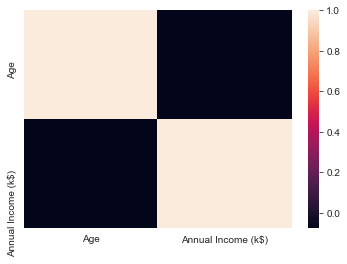

In [36]:
#create a heatmap
corr = df.select_dtypes("number").corr()
#plot a heatmap
sns.heatmap(corr);

SPLIT THE DATA

In [37]:
X = df[["Age","Annual Income (k$)"]]
print(X.shape)
X.head()

(160, 2)


,Age,Annual Income (k$)
20,35,24
21,25,24
22,46,25
23,31,25
24,54,28


BUILD A MODEL

In [38]:
#build
model = KMeans(n_clusters=3,random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [39]:
#extract cluster labels
labels = model.labels_
labels[:10] # first 10

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

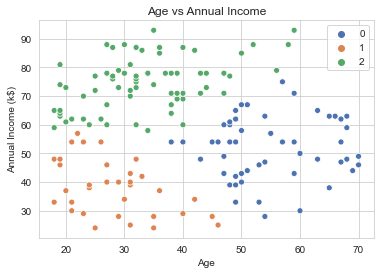

In [42]:
#plot clusters
sns.scatterplot(
    x=df["Age"],
    y=df["Annual Income (k$)"],
    hue=labels,
    palette="deep"
)
plt.title("Age vs Annual Income");

In [45]:
#extract centroids
centroids = model.cluster_centers_
centroids

array([[55.2962963 , 52.2037037 ],
       [28.3030303 , 38.        ],
       [33.49315068, 74.91780822]])

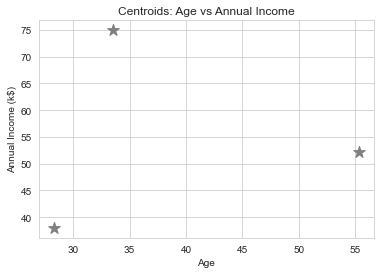

In [49]:
#plot the centroids
plt.scatter(
    x=centroids[:,0],
    y=centroids[:,1],
    color="gray",
    marker = "*",
    s=150

)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Centroids: Age vs Annual Income");

In [50]:
#calculate the inertia
inertia = model.inertia_
print("Inertia (3clusters):",inertia)

Inertia (3clusters): 27514.74164014575


In [51]:
#calculate the silhouette score
ss = silhouette_score(X,model.labels_)
print("Silhouette Score (3 clusters):",ss)

Silhouette Score (3 clusters): 0.445661276193016


In [53]:
#find the best k 
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

#add a for loop
for k in n_clusters:
    #build the model
    model = KMeans(n_clusters=k,random_state=42)
    #train the model
    model.fit(X)
    #calculate inertia
    inertia_errors.append(model.inertia_)
    #calculate the silhouette score
    silhouette_scores.append(silhouette_score(X,model.labels_))

print("Inertia:",inertia_errors)
print()
print("Silhouette Scores:",silhouette_scores)


Inertia: [45288.637585991244, 27514.74164014575, 20580.00817369093, 16453.61636798088, 13368.76835725678, 10727.611232134386, 9529.692171605484, 8557.232753795912, 7285.414627857522, 6350.40745614035, 5585.907347724738]

Silhouette Scores: [0.4122278872010424, 0.445661276193016, 0.4101141782009975, 0.38419591802210284, 0.39629662702546964, 0.41241911191936537, 0.4005504978012741, 0.3924473655501546, 0.42422645989805224, 0.41839451787872034, 0.42419171904983005]


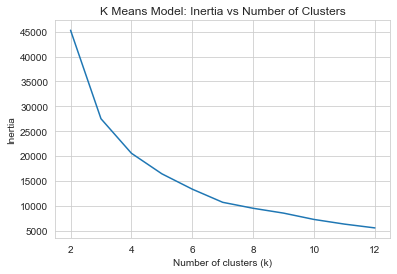

In [55]:
#inertia vs clusters
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("K Means Model: Inertia vs Number of Clusters");

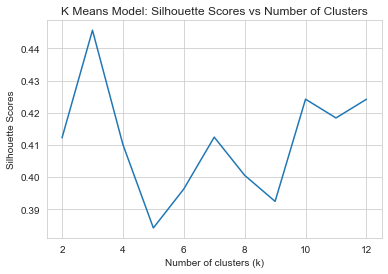

In [56]:
#inertia vs clusters
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Scores")
plt.title("K Means Model: Silhouette Scores vs Number of Clusters");

In [68]:
#build finala model
final_model = KMeans(n_clusters=4, random_state=42)
#fit the model
final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

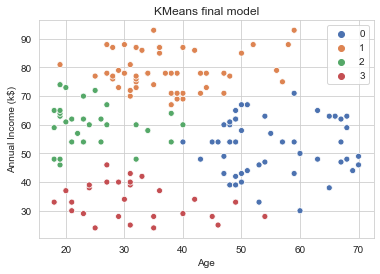

In [71]:
#plot the final clusters
sns.scatterplot(
    x=df["Age"],y=df["Annual Income (k$)"],
    hue=final_model.labels_,
    palette="deep"
)
plt.title("KMeans final model");

In [72]:
#create a side by side bar chart
xgb = X.groupby(final_model.labels_).mean()
xgb

,Age,Annual Income (k$)
0,55.760000,52.580000
1,37.222222,78.944444
2,24.482759,60.137931
3,31.740741,33.555556


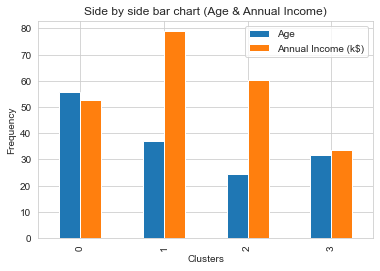

In [76]:
#build the chart (side by side)
xgb.plot(kind="bar")
plt.title("Side by side bar chart (Age & Annual Income)")
plt.xlabel("Clusters")
plt.ylabel("Frequency");

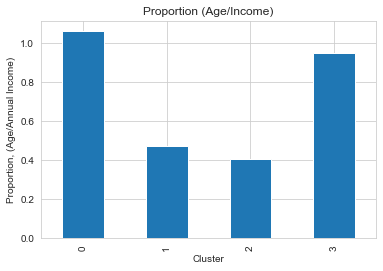

In [81]:
#get the proportion
(xgb["Age"]/xgb["Annual Income (k$)"]).plot(
    kind="bar"
);
plt.xlabel("Cluster")
plt.ylabel("Proportion, (Age/Annual Income)")
plt.title("Proportion (Age/Income)");